In [1]:
import numpy as np
import matplotlib.pyplot as plt
import unittest

Задача 1

In [9]:
# Функция

def sum_prod(X, V):

    products = []
    for i in range(len(X)):
        product = np.dot(X[i], V[i])
        products.append(product)

    result = np.sum(products, axis=0)

    if result.ndim == 1:
        result = result.reshape(-1, 1)

    return result

# Тесты

#1 Базовый случай

X_test1 = [
    np.array([[1, 2], [3, 4]]),
    np.array([[2, 0], [1, 3]])
]
V_test1 = [
    np.array([[1], [2]]),
    np.array([[3], [1]])
]
expected1 = np.array([[11], [17]])
assert np.array_equal(sum_prod(X_test1, V_test1), expected1)

#2 Нулевые матрицы

X_test2 = [
    np.zeros((2, 2)),
    np.zeros((2, 2))
]
V_test2 = [
    np.array([[1], [2]]),
    np.array([[3], [4]])
]
expected2 = np.zeros((2, 1))
assert np.array_equal(sum_prod(X_test2, V_test2), expected2)

#3 Одна матрица и вектор 3x3

X_test3 = [np.array([[1, 0, 2], [0, 1, 0], [2, 0, 1]])]
V_test3 = [np.array([[1], [2], [3]])]
expected3 = np.array([[7], [2], [5]])
assert np.array_equal(sum_prod(X_test3, V_test3), expected3)

Задача 2

In [11]:
# Функция

def binarize(M, threshold=0.5):
    M_array = np.array(M)
    binary_matrix = (M_array > threshold).astype(int)
    return binary_matrix

# Тесты

#1 Базовый случай

M1 = np.array([
    [0.1, 0.7, 0.3],
    [0.9, 0.5, 0.8],
    [0.2, 0.6, 0.4]
])
expected1 = np.array([
    [0, 1, 0],
    [1, 0, 1],
    [0, 1, 0]
])
assert np.array_equal(binarize(M1, 0.5), expected1)

#2 Граниченные значения

M2 = np.array([
    [0.5, 0.50001, 0.49999],
    [0.0, 1.0, 0.5]
])
expected2 = np.array([
    [0, 1, 0],
    [0, 1, 0]
])
assert np.array_equal(binarize(M2, 0.5), expected2)

#3 Одномерный массив

M3 = np.array([0.1, 0.6, 0.3, 0.8, 0.4])
expected4 = np.array([0, 1, 0, 1, 0])
assert np.array_equal(binarize(M3, 0.5), expected4)

Задача 3

In [19]:
# Функции

def unique_rows(mat):

    mat_array = np.array(mat)

    # Если матрица пустая или одномерная
    if mat_array.size == 0:
        return []
    if mat_array.ndim == 1:
        return [np.unique(mat_array)]

    unique_elements_per_row = []
    for row in mat_array:
        unique_elements = np.unique(row)
        unique_elements_per_row.append(unique_elements)

    return unique_elements_per_row

def unique_columns(mat):

    mat_array = np.array(mat)

    # Если матрица пустая
    if mat_array.size == 0:
        return []
    # Если одномерный массив, то рассматриваем как один столбец
    if mat_array.ndim == 1:
        return [np.unique(mat_array)]

    unique_elements_per_column = []
    for col_idx in range(mat_array.shape[1]):
        column = mat_array[:, col_idx]
        unique_elements = np.unique(column)
        unique_elements_per_column.append(unique_elements)

    return unique_elements_per_column

# Тесты

#1 Базовый случай

mat1 = [
    [1, 2, 2, 3, 1],
    [4, 4, 5, 6, 5],
    [7, 8, 7, 8, 9]
]
expected_rows1 = [np.array([1, 2, 3]), np.array([4, 5, 6]), np.array([7, 8, 9])]
expected_cols1 = [np.array([1, 4, 7]), np.array([2, 4, 8]), np.array([2, 5, 7]), np.array([3, 6, 8]), np.array([1, 5, 9])]

for i, (res, exp) in enumerate(zip(unique_rows(mat1), expected_rows1)):
    assert np.array_equal(res, exp)

for i, (res, exp) in enumerate(zip(unique_columns(mat1), expected_cols1)):
    assert np.array_equal(res, exp)

#2 Вектор

vec = [1, 2, 2, 3, 1, 4]
expected_unique = np.array([1, 2, 3, 4])
res_rows2 = unique_rows(vec)[0]
res_cols2 = unique_columns(vec)[0]
assert np.array_equal(res_rows2, expected_unique)
assert np.array_equal(res_cols2, expected_unique)

#3 Пустой массив

mat2 = []
assert unique_rows(mat2) == []
assert unique_columns(mat2) == []

Задача 4

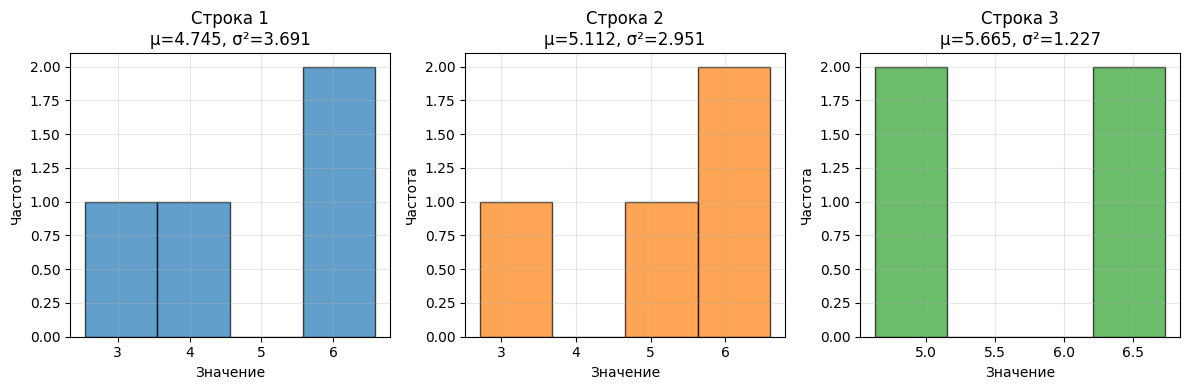

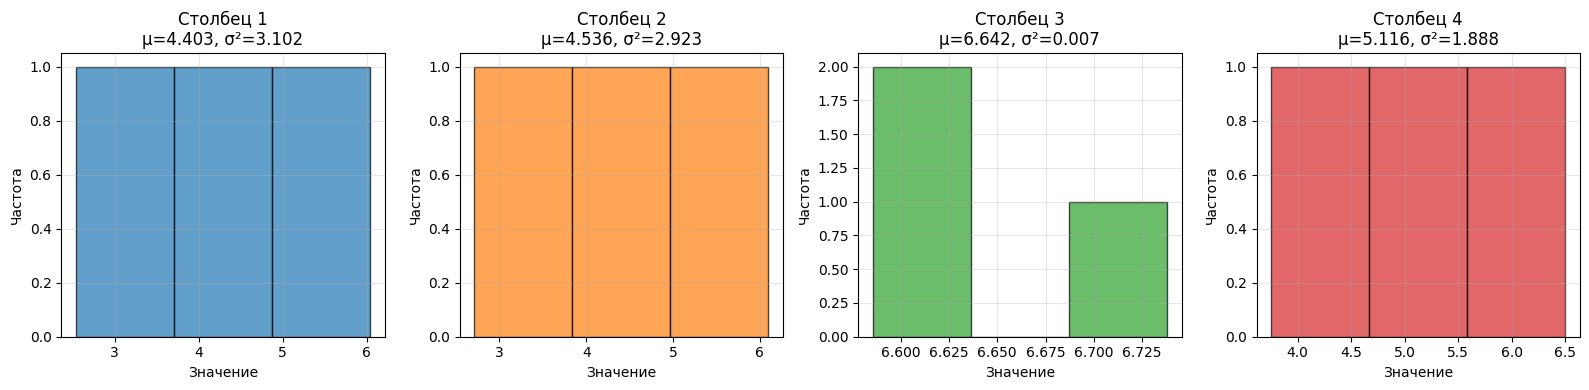

{'matrix': array([[2.53988373, 6.10107499, 6.58561373, 3.75293854],
       [6.04115267, 2.71131722, 6.60372206, 5.0931346 ],
       [4.62686046, 4.79650825, 6.73777231, 6.50082328]]), 'row_means': array([4.74487775, 5.11233164, 5.66549108]), 'row_variances': array([3.69117398, 2.95073089, 1.22715055]), 'col_means': array([4.40263229, 4.53630016, 6.64236937, 5.11563214]), 'col_variances': array([3.10242976, 2.92339563, 0.00690827, 1.88809724]), 'overall_mean': np.float64(5.174233487788151), 'overall_variance': np.float64(2.3022922822505056)}


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def filling_random_matrix(m, n, mean, std):

    matrix = np.random.normal(mean, std, size=(m, n))

    # Статистика для строк
    row_means = np.mean(matrix, axis=1)
    row_vars = np.var(matrix, axis=1, ddof=1)

    # Статистика для столбцов
    col_means = np.mean(matrix, axis=0)
    col_vars = np.var(matrix, axis=0, ddof=1)

    # Гистограмма для строк
    fig_rows, axes_rows = plt.subplots(1, m, figsize=(4*m, 4))
    if m == 1:
        axes_rows = [axes_rows]

    for i in range(m):
        axes_rows[i].hist(matrix[i, :], bins=min(10, n//2) if n > 4 else n,
                         alpha=0.7, color=f'C{i}', edgecolor='black')
        axes_rows[i].set_title(f'Строка {i+1}\nμ={row_means[i]:.3f}, σ²={row_vars[i]:.3f}')  # ←
        axes_rows[i].set_xlabel('Значение')
        axes_rows[i].set_ylabel('Частота')
        axes_rows[i].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Гистограмма для столбцов
    fig_cols, axes_cols = plt.subplots(1, n, figsize=(4*n, 4))
    if n == 1:
        axes_cols = [axes_cols]

    for j in range(n):
        axes_cols[j].hist(matrix[:, j], bins=min(10, m//2) if m > 4 else m,
                         alpha=0.7, color=f'C{j}', edgecolor='black')
        axes_cols[j].set_title(f'Столбец {j+1}\nμ={col_means[j]:.3f}, σ²={col_vars[j]:.3f}')  # ←
        axes_cols[j].set_xlabel('Значение')
        axes_cols[j].set_ylabel('Частота')
        axes_cols[j].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    return {
        'matrix': matrix,
        'row_means': row_means,
        'row_variances': row_vars,
        'col_means': col_means,
        'col_variances': col_vars,
        'overall_mean': np.mean(matrix),
        'overall_variance': np.var(matrix, ddof=1)
    }

print (filling_random_matrix(3, 4, 5, 2))

Задача 5

In [18]:
# Функция

def chess(m, n, a, b):

    # Определения типа данных
    if isinstance(a, str) or isinstance(b, str):
        dtype = object
    else:
        dtype = type(a) if type(a) == type(b) else float

    matrix = np.empty((m, n), dtype=dtype)

    for i in range(m):
        for j in range(n):
            if (i + j) % 2 == 0:
                matrix[i, j] = a
            else:
                matrix[i, j] = b

    return matrix

# Тесты

#1 Базовый случай


result1 = chess(2, 2, 1, 0)
expected1 = np.array([[1, 0], [0, 1]])
assert np.array_equal(result1, expected1)

#2 3x5 с символами

result2 = chess(3, 5, 'X', 'O')
expected2 = np.array([
    ['X', 'O', 'X', 'O', 'X'],
    ['O', 'X', 'O', 'X', 'O'],
    ['X', 'O', 'X', 'O', 'X']
], dtype=object)
assert np.array_equal(result2, expected2)

#3 Дробные значения

result3 = chess(2, 3, 1.5, -2.7)
expected3 = np.array([[1.5, -2.7, 1.5], [-2.7, 1.5, -2.7]])
assert np.array_equal(result3, expected3)

Задача 6

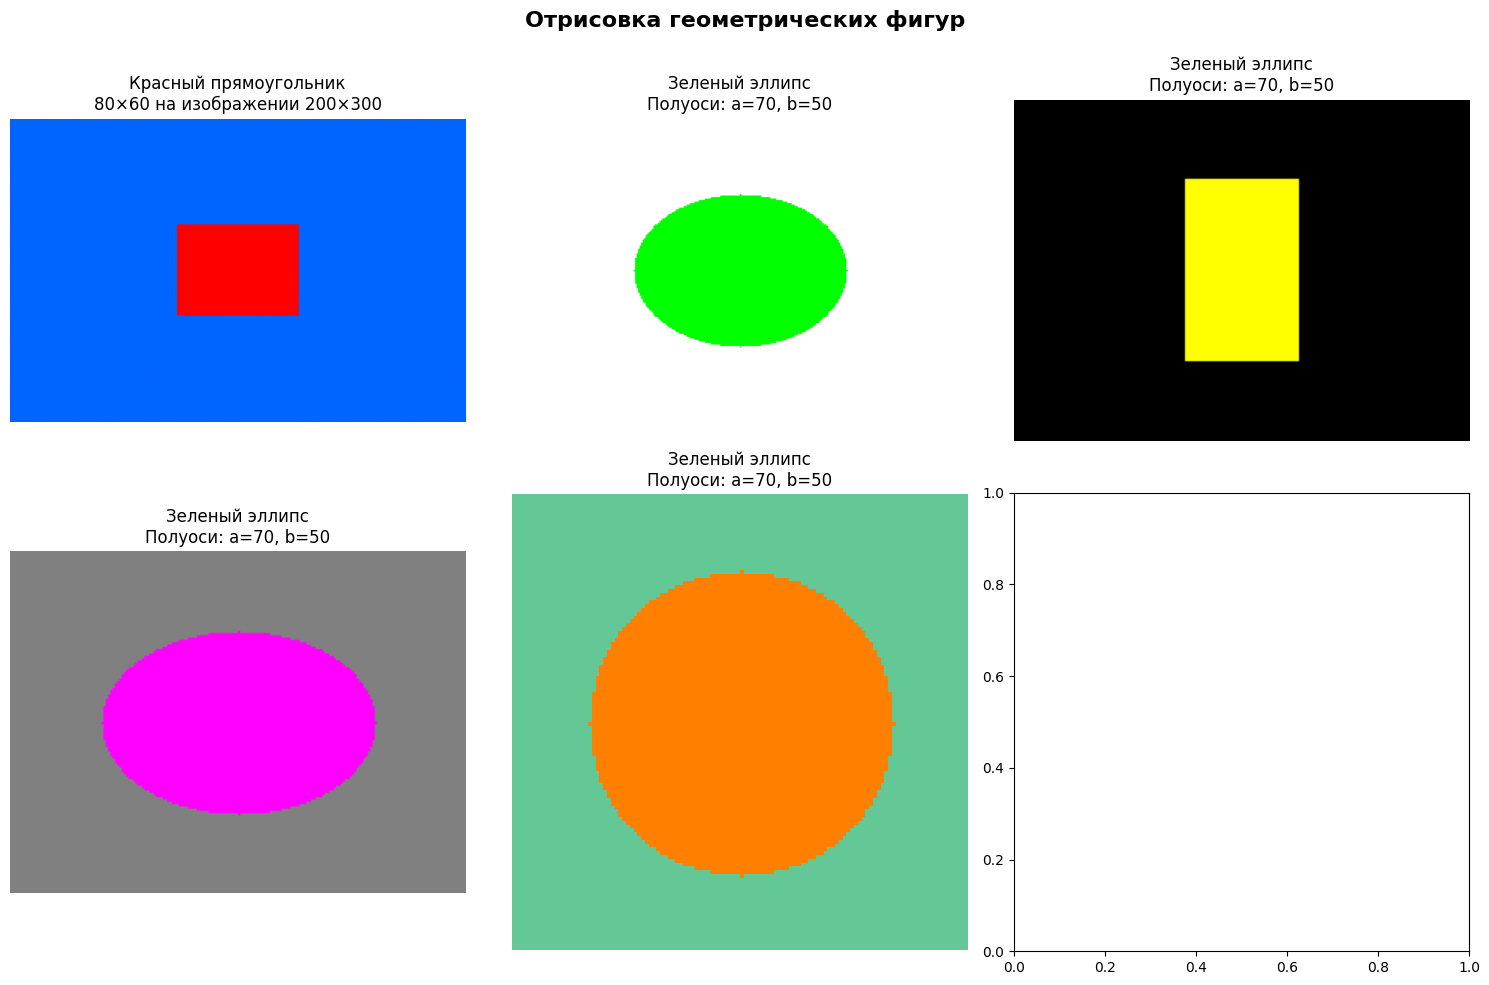

In [ ]:
# Функция

def draw_rectangle(a, b, m, n, rectangle_color, background_color):

    def normalize_color(color):
        return tuple(c / 255.0 if max(color) > 1 else c for c in color)

    bg_color = normalize_color(background_color)
    rect_color = normalize_color(rectangle_color)

    image = np.full((m, n, 3), bg_color, dtype=float)

    # Вычисляем позицию прямоугольника
    start_x = (n - a) // 2
    start_y = (m - b) // 2

    # Рисуем прямоугольник
    image[start_y:start_y + b, start_x:start_x + a] = rect_color

    return image


def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    def normalize_color(color):
        return tuple(c / 255.0 if max(color) > 1 else c for c in color)

    bg_color = normalize_color(background_color)
    ellipse_color_norm = normalize_color(ellipse_color)

    image = np.full((m, n, 3), bg_color, dtype=float)

    # Центр изображения
    center_x = n // 2
    center_y = m // 2

    y, x = np.ogrid[:m, :n]

    # Уравнение эллипса
    ellipse_mask = ((x - center_x) ** 2) / (a ** 2) + ((y - center_y) ** 2) / (b ** 2) <= 1

    # Применяем маску эллипса
    image[ellipse_mask] = ellipse_color_norm

    return image

# Тесты

#1 Прямоугольник

rect1 = draw_rectangle(10, 8, 20, 25, (255, 0, 0), (0, 255, 0))
assert rect1.shape == (20, 25, 3)

#2 Цвет прямоугольника в центре

center_rect_color = rect1[10, 12]
expected_rect_color = np.array([1.0, 0.0, 0.0])  # Красный цвет
assert np.allclose(center_rect_color, expected_rect_color)

#3 Эллипс

ellipse1 = draw_ellipse(6, 4, 15, 20, (0, 0, 255), (255, 255, 255))
assert ellipse1.shape == (15, 20, 3)

#4 Цвет эллипса в центре

center_ellipse_color = ellipse1[7, 10]
expected_ellipse_color = np.array([0.0, 0.0, 1.0])  # Синий цвет
assert np.allclose(center_ellipse_color, expected_ellipse_color)

Задача 7

In [ ]:
def analyze_time_series(data, window_size=3):

    series = np.array(data)
    n = int(len(series))

    # Основные характеристики
    mean_value = float(np.mean(series))
    variance = float(np.var(series, ddof=1)) if n > 1 else 0
    std_deviation = float(np.std(series, ddof=1)) if n > 1 else 0

    # Поиск локальных максимумов и минимумов
    local_maxima = []
    local_minima = []
    local_max_indices = []
    local_min_indices = []

    # Проверка каждой точкии, кроме первой и последней
    for i in range(1, n - 1):
        if series[i] > series[i-1] and series[i] > series[i+1]:
            local_maxima.append(float(series[i]))
            local_max_indices.append(int(i))

        if series[i] < series[i-1] and series[i] < series[i+1]:
            local_minima.append(float(series[i]))
            local_min_indices.append(int(i))

    # Скользящее среднее
    moving_average = []
    half_window = window_size // 2

    for i in range(n):
        start = max(0, i - half_window)
        end = min(n, i + half_window + 1)

        if end - start < window_size:
            if i < half_window:
                end = min(n, start + window_size)
            else:
                start = max(0, end - window_size)

        window_mean = float(np.mean(series[start:end]))
        moving_average.append(window_mean)

    return {
        'original_series': series,
        'length': n,
        'mean': mean_value,
        'variance': variance,
        'std_deviation': std_deviation,
        'min_value': float(np.min(series)),
        'max_value': float(np.max(series)),
        'median': float(np.median(series)),
        'local_maxima': {
            'values': local_maxima,
            'indices': local_max_indices
        },
        'local_minima': {
            'values': local_minima,
            'indices': local_min_indices
        },
        'moving_average': np.array(moving_average),
        'window_size': window_size
    }

simple_data = [1, 3, 2, 4, 1, 5, 2, 6, 1, 4, 2, 3, 1, 7, 2]
results = analyze_time_series(simple_data, window_size=3)
print(results)

{'original_series': array([1, 3, 2, 4, 1, 5, 2, 6, 1, 4, 2, 3, 1, 7, 2]), 'length': 15, 'mean': 2.933333333333333, 'variance': 3.638095238095238, 'std_deviation': 1.9073791542572855, 'min_value': 1.0, 'max_value': 7.0, 'median': 2.0, 'local_maxima': {'values': [3.0, 4.0, 5.0, 6.0, 4.0, 3.0, 7.0], 'indices': [1, 3, 5, 7, 9, 11, 13]}, 'local_minima': {'values': [2.0, 1.0, 2.0, 1.0, 2.0, 1.0], 'indices': [2, 4, 6, 8, 10, 12]}, 'moving_average': array([2.        , 2.        , 3.        , 2.33333333, 3.33333333,
       2.66666667, 4.33333333, 3.        , 3.66666667, 2.33333333,
       3.        , 2.        , 3.66666667, 3.33333333, 3.33333333]), 'window_size': 3}


Задача 8

In [ ]:
import numpy as np

def one_hot_encode(labels):

    labels_array = np.array(labels)

    # Приводим к целым числам
    labels_int = labels_array.astype(int)

    # Определяем количество классов
    n_classes = int(np.max(labels_int)) + 1
    n_samples = len(labels_int)

    # Создаем матрицу one-hot-encoding
    one_hot_matrix = np.zeros((n_samples, n_classes), dtype=int)

    # Заполняем единицами соответствующие позиции
    for i, label in enumerate(labels_int):
        one_hot_matrix[i, label] = 1

    return one_hot_matrix

result = one_hot_encode([1, 1, 0, 2, 1, 0])
print(result)

[[0 1 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]]
